In [2]:
import torch
import matplotlib.pyplot as plt
from torchvision.utils import make_grid

import id_gan

In [ ]:
results = id_gan.train_vae("celeba", batch_size=128, num_workers=8, epochs=20)
plt.plot(results["loss"])

Using device cuda
Files already downloaded and verified


[epoch 8] loss = 897.8106:  45%|████▍     | 11408/25440 [14:49<19:45, 11.84it/s] 

In [3]:
vae = id_gan.load_vae("mnist")

with torch.no_grad():
    images = vae.sample(16)

plt.figure(figsize=(10, 10))
for ind, image in enumerate(images):
    plt.subplot(4, 4, ind+1)
    plt.imshow(image[0].numpy())
plt.show()

Loading VAE model from output/celeba_vae.pt


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


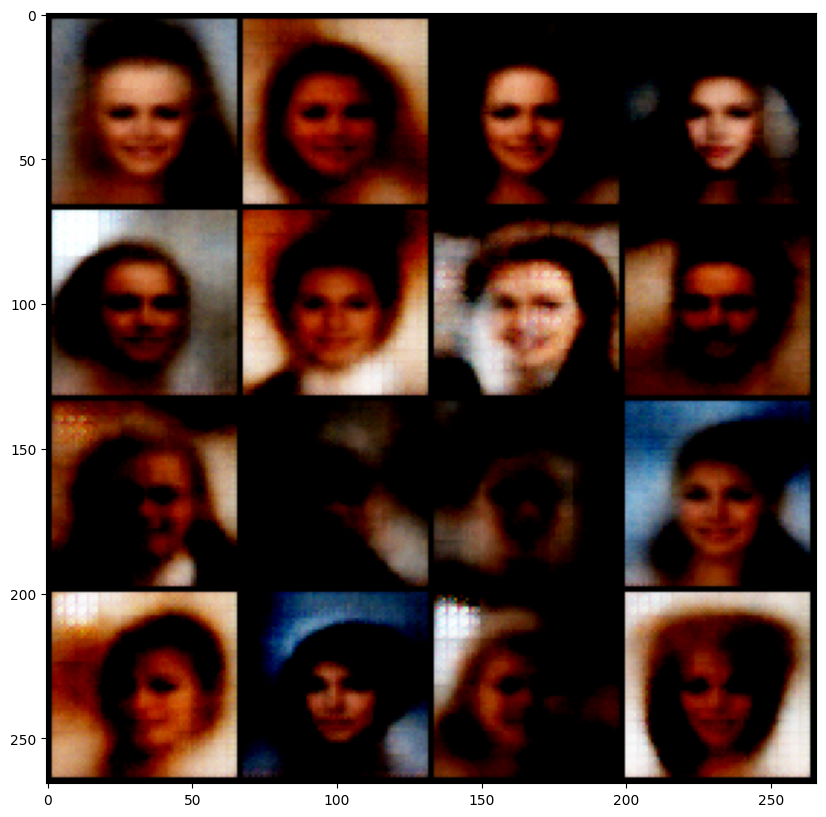

In [ ]:
images = vae.sample(16)

plt.figure(figsize=(10, 10))
plt.imshow(make_grid(images, nrow=4).permute(1,2,0))